<a href="https://colab.research.google.com/github/Wildemberg-Projects/Plants-Diseases/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Instalação de Dependências
# Para utilização do Colab, modifique o '%' por '!'
# As abaixo comentadas são somente para instalar em ambiente local
# %pip install -q -U tensorflow
# %pip install -q -U keras
# %pip install -q -U numpy
# %pip install -q -U pandas
# %pip install -q -U Jinja2
# Uso da GPU precisa ser habilitado pelo comando a seguir
# %pip install tensorflow[and-cuda]
%pip install -q -U tensorflow-addons
%pip install -q -U tensorflow-datasets
%pip install -q -U keras-utils
%pip install -q -U matplotlib


In [3]:
import tensorflow_datasets as tfds
import pandas as pd
from numpy import mean
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Coletando dados
tf.keras.backend.clear_session()
(ds_train), info = tfds.load('plant_village', split='train', with_info=True)

# a estrutura de uma imagem (244,244,3), representa a largura e altura em pixels,
# e o 3 representa a quantidade de canais de cores pq é RGB

In [6]:
# Dividir os dados de treinamento em treinamento e validação
# Embaralhando os dados para garantir que tanto a validação quanto o treinamento tenham todos os tipos de dados
ds_train = ds_train.shuffle(buffer_size=1000, seed=42)

# Calcular o tamanho do conjunto de validação como 25% dos dados de treinamento
train_size = ds_train.cardinality().numpy()
validation_size = train_size // 4  # 25% dos dados de treinamento

# Dividindo os dados
ds_validation = ds_train.take(validation_size)
ds_train = ds_train.skip(validation_size)

# Verificar o número de exemplos em cada conjunto de dados
num_train_examples = ds_train.cardinality().numpy()
num_validation_examples = ds_validation.cardinality().numpy()
print("Número de exemplos de treinamento:", num_train_examples)
print("Número de exemplos de validação:", num_validation_examples)

Número de exemplos de treinamento: 40728
Número de exemplos de validação: 13575


In [7]:
df_validation = tfds.as_dataframe(ds_validation, info)
df_train = tfds.as_dataframe(ds_train, info)

In [8]:
print(df_validation)

                                                   image       image/filename  \
0      [[[50, 57, 63], [81, 88, 94], [94, 101, 107], ...   b'image (183).JPG'   
1      [[[102, 89, 98], [102, 89, 98], [116, 103, 112...   b'image (285).JPG'   
2      [[[94, 94, 86], [96, 96, 88], [99, 99, 91], [1...  b'image (1814).JPG'   
3      [[[66, 61, 58], [54, 49, 46], [53, 48, 45], [6...   b'image (963).JPG'   
4      [[[136, 125, 139], [137, 126, 140], [139, 128,...   b'image (889).JPG'   
...                                                  ...                  ...   
13570  [[[156, 154, 159], [157, 155, 160], [158, 156,...   b'image (182).JPG'   
13571  [[[139, 133, 145], [111, 105, 117], [127, 121,...   b'image (586).JPG'   
13572  [[[113, 103, 101], [112, 102, 100], [113, 103,...  b'image (3501).JPG'   
13573  [[[203, 201, 204], [201, 199, 202], [202, 200,...   b'image (692).JPG'   
13574  [[[134, 122, 122], [134, 122, 122], [133, 121,...  b'image (1879).JPG'   

       label  
0         31

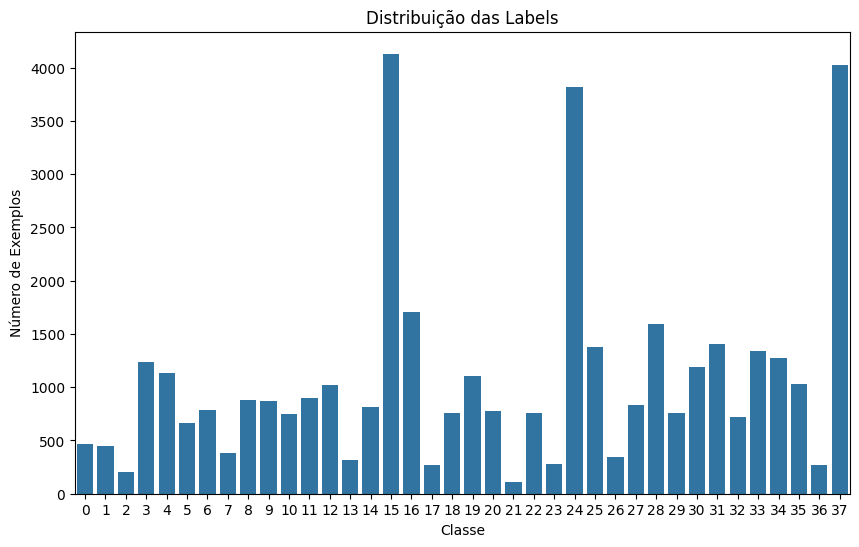

In [11]:
# Visualização da Distribuição das Classes

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_train)
plt.title('Distribuição das Labels')
plt.xlabel('Classe')
plt.ylabel('Número de Exemplos')
plt.show()

